In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
df_historico = pd.read_csv('../Hackathon Sistecredito/Datasets/HistoricoContactCenter.csv')
df_historico

,Fecha_Inicio,Fecha_Fin,Duracion,Tema,Respuesta,Agente_ID
0,17/10/24 19:12,18/10/24 00:40,19726.026,NaN,NaN,NaN
1,17/10/24 19:24,18/10/24 00:27,18206.261,NaN,NaN,NaN
2,17/10/24 19:28,18/10/24 02:13,24272.567,NaN,NaN,NaN
3,17/10/24 19:29,18/10/24 00:00,16230.376,NaN,NaN,NaN
4,17/10/24 19:35,18/10/24 00:19,17057.885,NaN,NaN,NaN
...,...,...,...,...,...,...
1580382,31/10/24 23:54,1/11/24 03:55,14479.455,NaN,NaN,NaN
1580383,31/10/24 23:54,1/11/24 03:56,14497.750,NaN,NaN,NaN
1580384,31/10/24 23:56,1/11/24 00:57,3624.499,NaN,NaN,NaN
1580385,31/10/24 23:57,1/11/24 00:03,376.500,NaN,Isabot Fuera de Horario de Atención,NaN


In [25]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580387 entries, 0 to 1580386
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Fecha_Inicio  1580387 non-null  object 
 1   Fecha_Fin     1579103 non-null  object 
 2   Duracion      1579103 non-null  float64
 3   Tema          116851 non-null   object 
 4   Respuesta     138296 non-null   object 
 5   Agente_ID     116850 non-null   float64
dtypes: float64(2), object(4)
memory usage: 72.3+ MB


In [26]:
df_historico.isnull().sum()

Fecha_Inicio          0
Fecha_Fin          1284
Duracion           1284
Tema            1463536
Respuesta       1442091
Agente_ID       1463537
dtype: int64

In [27]:
df_historico['Fecha_Inicio'] = pd.to_datetime(df_historico['Fecha_Inicio'])
df_historico['Fecha_Fin'] = pd.to_datetime(df_historico['Fecha_Fin'])
df_historico.info()

/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_11137/2717942960.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha_Inicio'] = pd.to_datetime(df_historico['Fecha_Inicio'])
/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_11137/2717942960.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha_Fin'] = pd.to_datetime(df_historico['Fecha_Fin'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580387 entries, 0 to 1580386
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Fecha_Inicio  1580387 non-null  datetime64[ns]
 1   Fecha_Fin     1579103 non-null  datetime64[ns]
 2   Duracion      1579103 non-null  float64       
 3   Tema          116851 non-null   object        
 4   Respuesta     138296 non-null   object        
 5   Agente_ID     116850 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 72.3+ MB


In [28]:
# Llenar valores nulos
df_historico['Fecha_Fin'] = df_historico['Fecha_Fin'].fillna(method='ffill')
df_historico.isnull().sum()

/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_11137/1675229421.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_historico['Fecha_Fin'] = df_historico['Fecha_Fin'].fillna(method='ffill')


Fecha_Inicio          0
Fecha_Fin             0
Duracion           1284
Tema            1463536
Respuesta       1442091
Agente_ID       1463537
dtype: int64

In [ ]:
# Llenar valor nulos con infinito
df_historico['Duracion'] = pd.to_numeric(df_historico['Duracion'], errors='coerce') / 60
duracion = df_historico['Duracion']

0          5.479452
1          5.057295
2          6.742380
3          4.508438
4          4.738301
             ...   
1580382    4.022071
1580383    4.027153
1580384    1.006805
1580385    0.104583
1580386    4.046333
Name: Duracion, Length: 1580387, dtype: float64

In [ ]:
# Análisis estadístico duración
print()

In [31]:
df_cleaned = df_historico.drop(columns=['Agente_ID'])

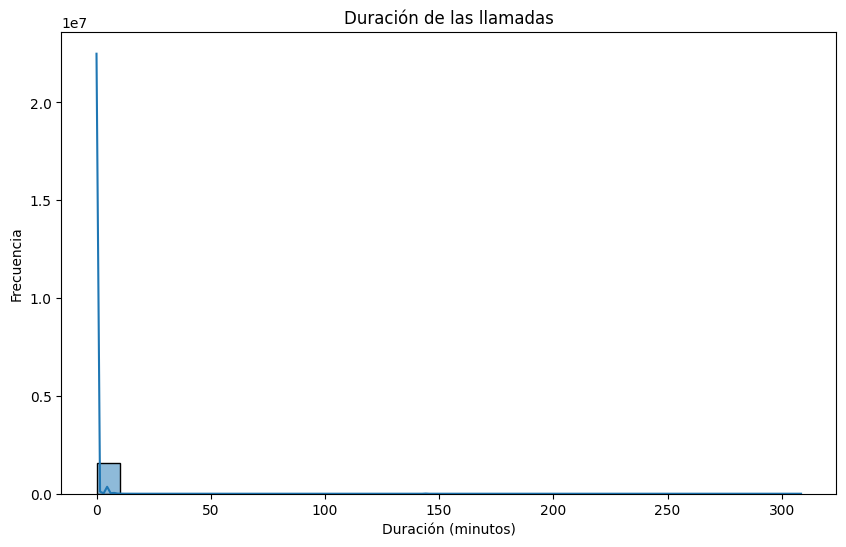

In [33]:
# Gráfica duración llamadas
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Duracion'].dropna(), bins=30, kde=True)
plt.title('Duración de las llamadas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()